In [1]:
# Pip install method (recommended)
!pip install torch==2.5.0
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 45.2/112.6 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!mkdir datasets
%cd datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZmgIf2ljORukVGbbnzrY")
project = rf.workspace("college-if44x").project("on-tree-mature-coconut-fruit-detection")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to On-tree-mature-coconut-fruit-detection-1 in yolov8:: 100%|██████████| 548/548 [00:00<00:00, 6081.89it/s]


## Custom Training

In [6]:
%cd /content/datasets/On-tree-mature-coconut-fruit-detection-1
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content/datasets/On-tree-mature-coconut-fruit-detection-1
100% 21.5M/21.5M [00:00<00:00, 273MB/s]
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/On-tree-mature-coconut-fruit-detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sh

In [7]:
!ls runs/detect/train/

args.yaml			 R_curve.png	     train_batch2.jpg
confusion_matrix_normalized.png  results.csv	     val_batch0_labels.jpg
confusion_matrix.png		 results.png	     val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg    val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch180.jpg  val_batch1_pred.jpg
labels.jpg			 train_batch181.jpg  weights
P_curve.png			 train_batch182.jpg
PR_curve.png			 train_batch1.jpg


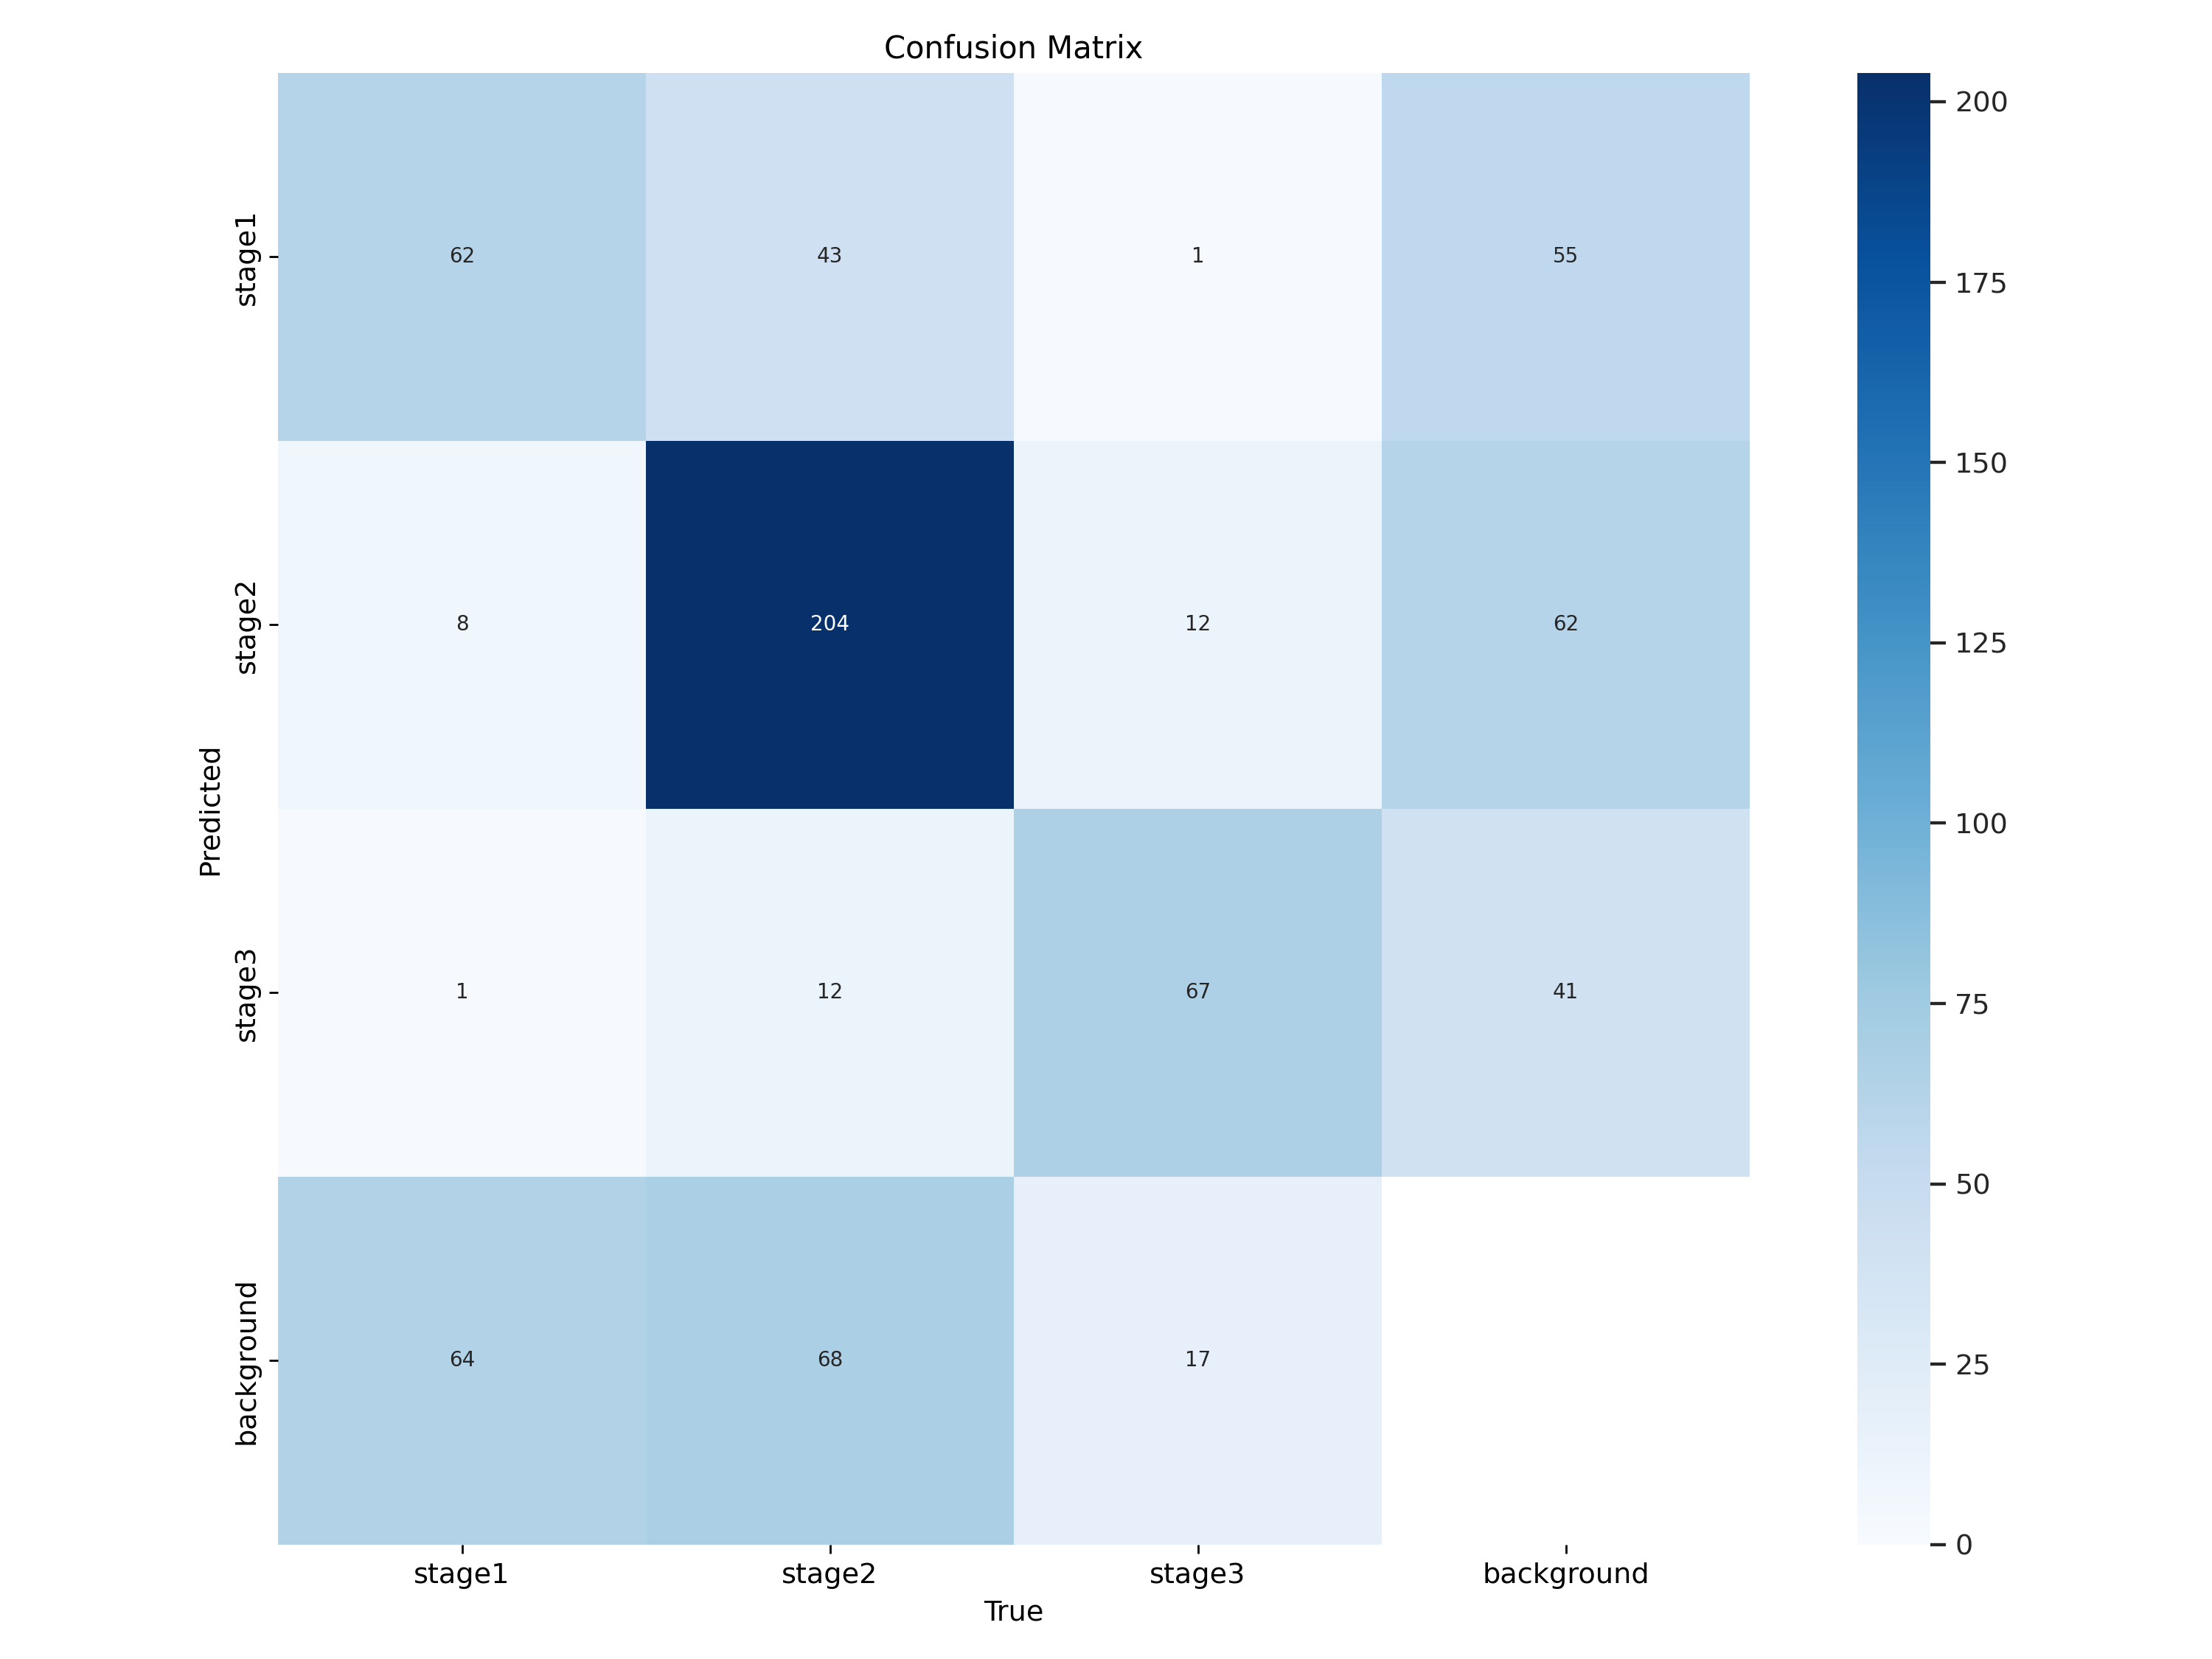

In [9]:
Image(filename='/content/datasets/On-tree-mature-coconut-fruit-detection-1/runs/detect/train/confusion_matrix.png', width=600)

## Validate Custom Model

In [11]:


!yolo task=detect mode=val model=/content/datasets/On-tree-mature-coconut-fruit-detection-1/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1511.1±829.6 MB/s, size: 71.1 KB)
val: Scanning /content/datasets/On-tree-mature-coconut-fruit-detection-1/valid/labels.cache... 53 images, 2 backgrounds, 0 corrupt: 100% 53/53 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.47it/s]
                   all         53        559      0.585      0.591      0.581      0.436
                stage1         31        135      0.409      0.452      0.332      0.251
                stage2         40        327      0.745      0.609      0.719      0.566
                stage3         17         97        0.6      0.711      0.691      0.491
Speed: 10.5ms preprocess, 20.3ms inference, 0.1ms loss, 4.6ms postprocess per image
Results saved to runs/detec

## Inference with Custom Model

In [12]:

!yolo task=detect mode=predict model=/content/datasets/On-tree-mature-coconut-fruit-detection-1/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/28 /content/datasets/On-tree-mature-coconut-fruit-detection-1/test/images/00003_jpg.rf.685ee7b127bd0896095d95bc5b656151.jpg: 800x800 6 stage2s, 22.8ms
image 2/28 /content/datasets/On-tree-mature-coconut-fruit-detection-1/test/images/00011_jpg.rf.b959217cc39f290e6ec84f3187dd4959.jpg: 800x800 8 stage2s, 22.9ms
image 3/28 /content/datasets/On-tree-mature-coconut-fruit-detection-1/test/images/00118_JPG.rf.c865049fcc80421b09821291ea49eca1.jpg: 800x800 15 stage3s, 22.8ms
image 4/28 /content/datasets/On-tree-mature-coconut-fruit-detection-1/test/images/00141_JPG.rf.662e9406ebdd8691a54bbbd9799131fb.jpg: 800x800 6 stage2s, 2 stage3s, 22.8ms
image 5/28 /content/datasets/On-tree-mature-coconut-fruit-detection-1/test/images/00147_JPG.rf.031898d565a1d103eb5e253d77e202da.jpg: 800x800 11 stage3s, 22.8ms
image 6/28 /content/datase

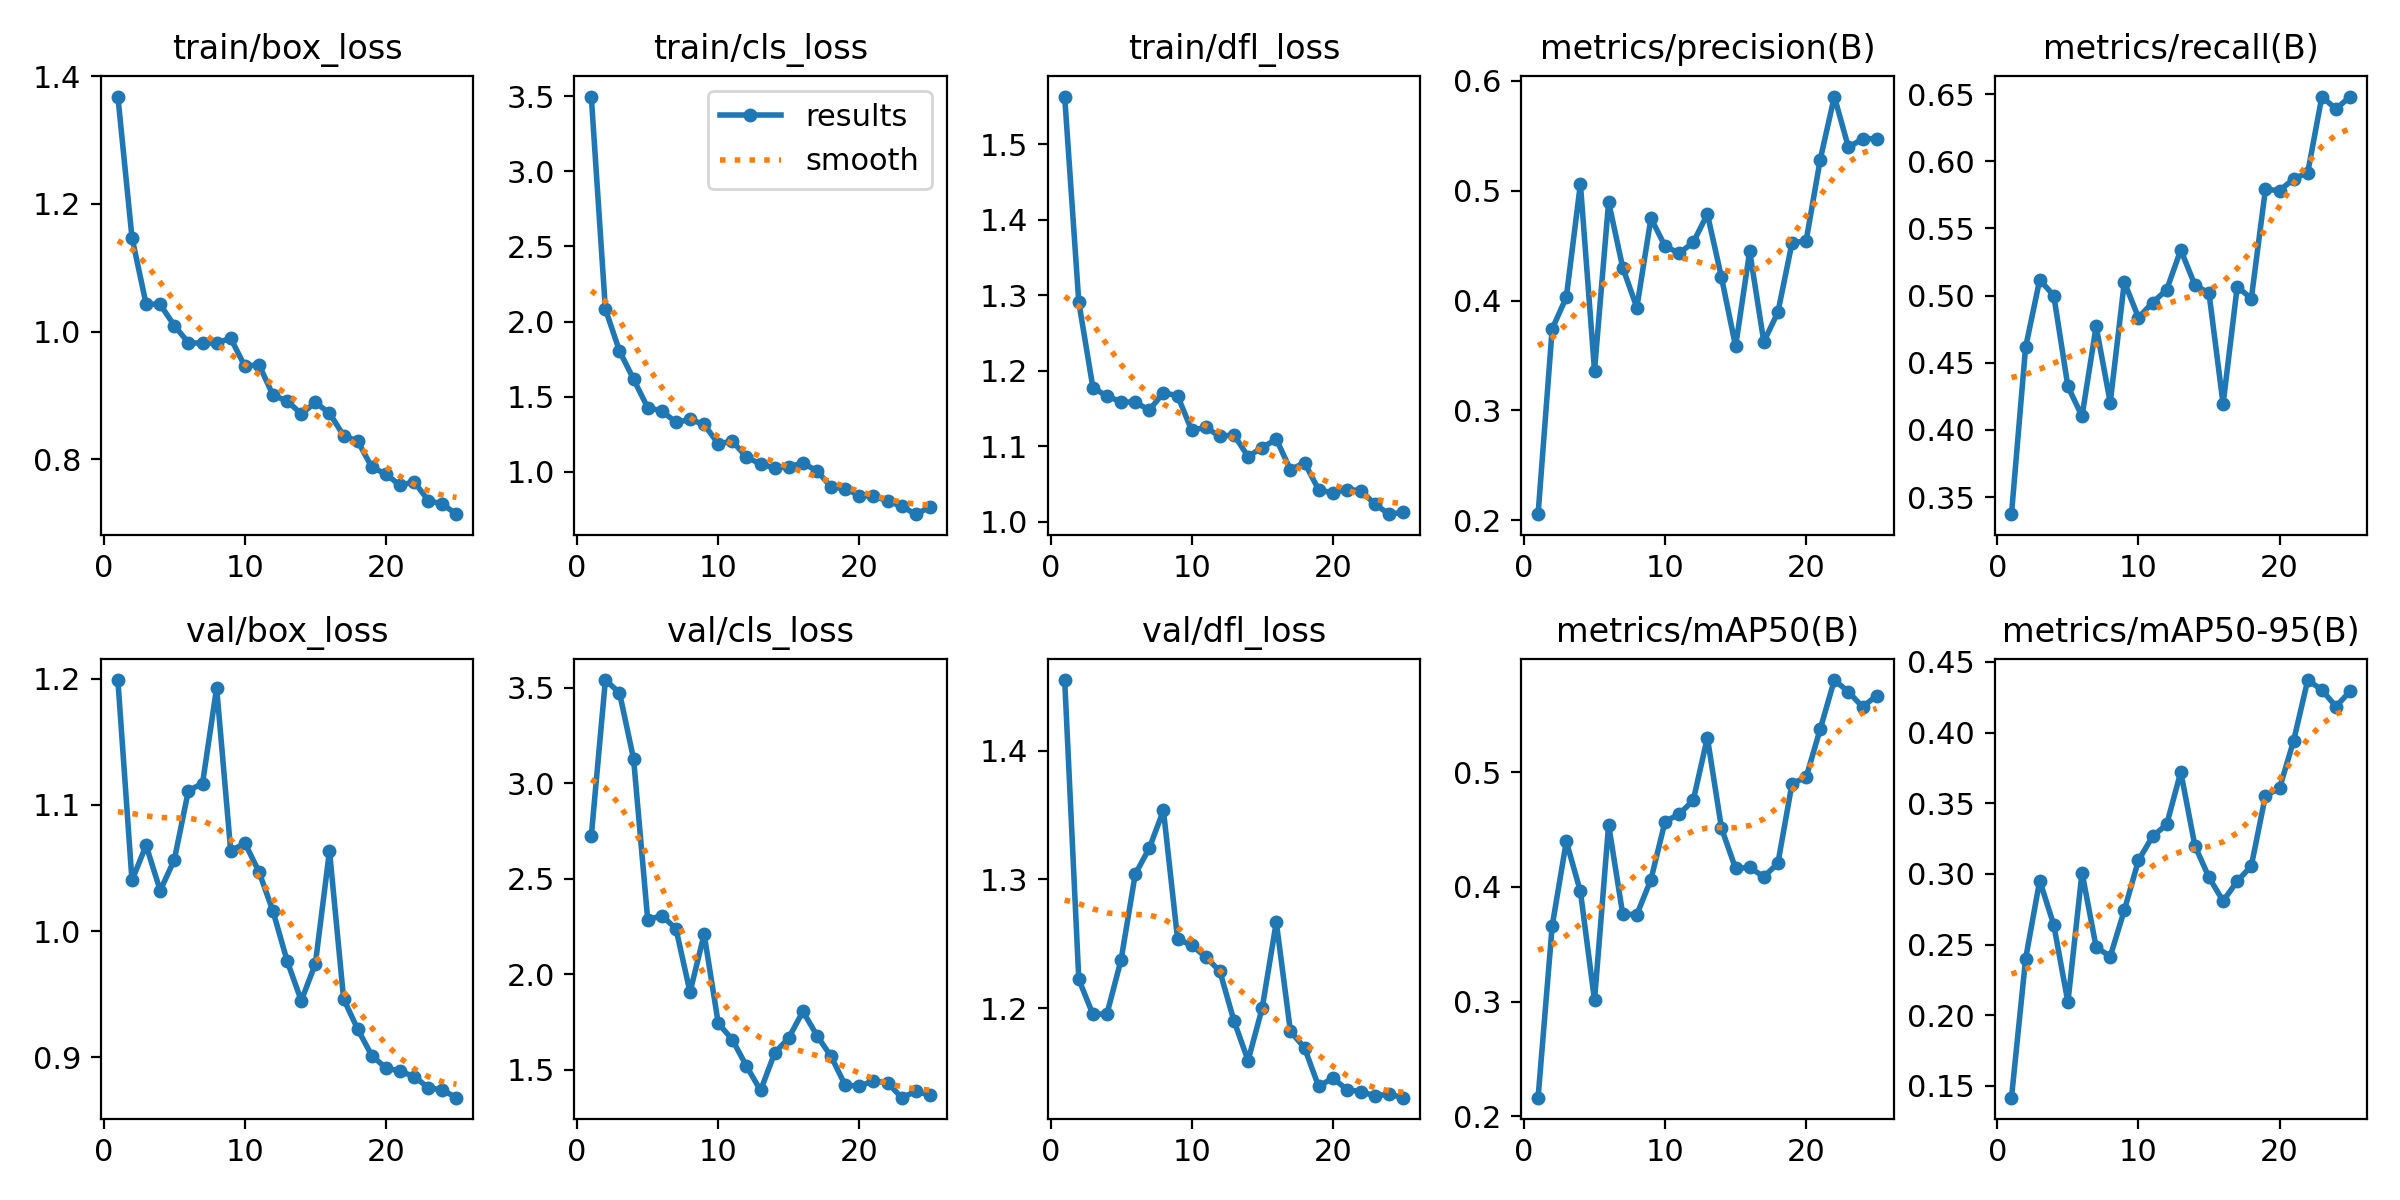

In [13]:


from IPython.display import Image

Image(filename='/content/datasets/On-tree-mature-coconut-fruit-detection-1/runs/detect/train/results.png', width=600)


In [15]:


import glob
from IPython.display import Image, display

# Get a list of all prediction image files
image_files = glob.glob('/content/datasets/On-tree-mature-coconut-fruit-detection-1/runs/detect/predict/*.jpg')

# Display each prediction image
for image_file in image_files:
  display(Image(filename=image_file))


Output hidden; open in https://colab.research.google.com to view.

**NOTE:** Let's take a look at few results.